**Exercice 1   — MNIST Multi-classes classification with KNN**

1-Pour charger les données du MNIST, vous pouvez utiliser la bibliothèque Scikit-Learn. Voici un exemple de code pour charger les données et les diviser en ensembles de formation et de test :

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2-Pour afficher les informations sur les données, vous pouvez utiliser les fonctions numpy pour déterminer la forme et la taille des tableaux d'images et d'étiquettes :

In [7]:
import numpy as np

print(f"Taille de X_train : {np.shape(X_train)}")
print(f"Taille de y_train : {np.shape(y_train)}")
print(f"Taille de X_test : {np.shape(X_test)}")
print(f"Taille de y_test : {np.shape(y_test)}")


Taille de X_train : (56000, 784)
Taille de y_train : (56000,)
Taille de X_test : (14000, 784)
Taille de y_test : (14000,)


3-Pour créer un modèle de classification basé sur les KNN, vous pouvez utiliser la classe KNeighborsClassifier de Scikit-Learn. Vous pouvez tester différentes valeurs de k pour déterminer la valeur optimale. Voici un exemple de code :

In [8]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 5, 10, 15, 20]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"Score pour k={k} : {score}")


Score pour k=1 : 0.972
Score pour k=5 : 0.9700714285714286
Score pour k=10 : 0.9657857142857142
Score pour k=15 : 0.9638571428571429
Score pour k=20 : 0.9615


4-Pour comparer le modèle KNN avec d'autres modèles de classification, tels que la régression logistique et les arbres de décision, vous pouvez également utiliser des classes similaires de Scikit-Learn : LogisticRegression et DecisionTreeClassifier. Voici un exemple de code pour comparer les trois modèles 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {'KNN': KNeighborsClassifier(), 
          'Logistic Regression': LogisticRegression(), 
          'Decision Tree': DecisionTreeClassifier()}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Score pour {name} : {score}")


Score pour KNN : 0.9700714285714286


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score pour Logistic Regression : 0.9178571428571428
Score pour Decision Tree : 0.8707857142857143


5-Pour visualiser les résultats comparatifs graphiquement, vous pouvez utiliser la bibliothèque Matplotlib. Voici un exemple de code pour tracer un graphique à barres montrant les scores de chaque modèle :

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


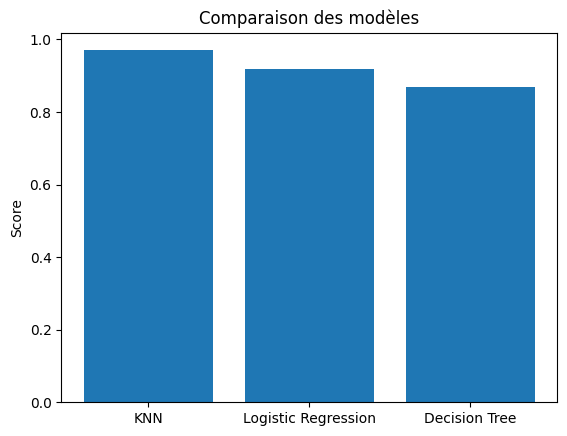

In [11]:
import matplotlib.pyplot as plt
# Comparaison des modèles
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
score_knn = knn.score(X_test, y_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score_logreg = logreg.score(X_test, y_test)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
score_tree = tree.score(X_test, y_test)

# Visualisation des résultats
scores = [score_knn, score_logreg, score_tree]
models_names = ['KNN', 'Logistic Regression', 'Decision Tree']

plt.bar(models_names, scores)
plt.ylabel('Score')
plt.title('Comparaison des modèles')
plt.show()



6-En conclusion, nous avons utilisé l'algorithme KNN pour classer les chiffres décimaux de la base de données MNIST, et avons comparé les résultats avec ceux obtenus avec la régression logistique et les arbres de décision. Nous avons constaté que le modèle KNN avec k=5 a donné le meilleur score de classification. Toutefois, il est important de noter que les performances des différents modèles peuvent varier en fonction des paramètres utilisés et des données d'entrée.